## scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2) # degree:添加几次幂
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X2[:5, :]

array([[ 1.        ,  1.60908715,  2.58916144],
       [ 1.        , -1.90281244,  3.62069518],
       [ 1.        , -1.58031877,  2.4974074 ],
       [ 1.        ,  2.42983883,  5.90411674],
       [ 1.        , -1.1419886 ,  1.30413797]])

In [7]:
X[:5, :]

array([[ 1.60908715],
       [-1.90281244],
       [-1.58031877],
       [ 2.42983883],
       [-1.1419886 ]])

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

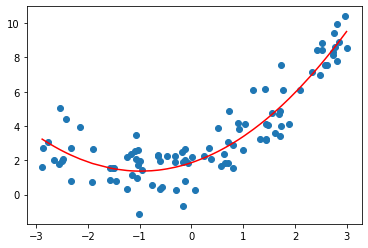

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [10]:
lin_reg2.coef_

array([0.        , 1.00941204, 0.51440237])

In [11]:
lin_reg2.intercept_

1.8657523620874799

## 关于PolynomialFeatures

In [12]:
X = np.arange(1, 11).reshape(-1, 2)

In [13]:
X.shape

(5, 2)

In [14]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [18]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)

In [19]:
X3.shape

(5, 10)

In [20]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

## PipeLine

In [21]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [24]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

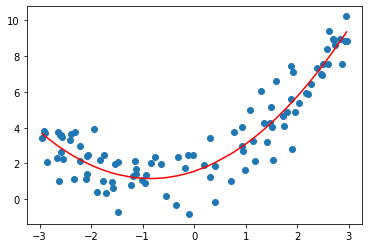

In [25]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()